<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Python en ciencias e ingeniería: tutoriales basados en ejemplos</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo y Adrián Navas Montilla</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

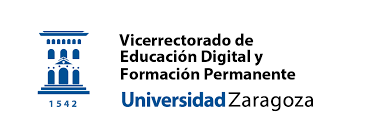

---
Producción de contenidos educativos digitales UNIZAR 2022-2023

**Objetos de aprendizaje abiertos del Vicerrectorado de Educación Digital y Formación Permanente de la Universidad de Zaragoza en el marco del Proyecto UniProducción incluido en el Plan UniDigital.**
---



## <center> Propiedades de scattering de una lámina dieléctrica (tratamiento error estadístico) </center>


-----------------------------------------

# Funciones auxiliares (para pintar gráficos, etc.)

In [ ]:
def plot_figure(x,y,xlabel,ylabel,path,pngname,**kwargs):
    import matplotlib.pyplot as plt
    #plt.style.use('ggplot') #('seaborn-whitegrid')
    '''
    Función para dibujar funciones f=f(x)
    '''

    '''
    'seaborn-ticks', 'ggplot', 'dark_background', 'bmh', 'seaborn-poster',
    'seaborn-notebook', 'fast', 'seaborn', 'classic', 'Solarize_Light2',
    'seaborn-dark', 'seaborn-pastel', 'seaborn-muted', '_classic_test',
    'seaborn-paper', 'seaborn-colorblind', 'seaborn-bright', 'seaborn-talk',
    'seaborn-dark-palette', 'tableau-colorblind10', 'seaborn-darkgrid',
    'seaborn-whitegrid', 'fivethirtyeight', 'grayscale', 'seaborn-white', 'seaborn-deep']
    '''
    xmin=kwargs.get('xmin')
    xmax=kwargs.get('xmax')
    ymin=kwargs.get('ymin')
    ymax=kwargs.get('ymax')
    symbol_size=kwargs.get('symbol_size',0)
    line_width=kwargs.get('line_width',2)

    labels,colors,line = [],[],[]
    colors = ["blue","green","red"]
    line = ["-","--","-"]
    labels = ["R","T","2"]
    dpi=220; figy=2;figx=1.5*figy
    fig, ax = plt.subplots(num=None, dpi=dpi,figsize=(figx,figy), facecolor='w', edgecolor='k')
    for i in range(0,len(y)):
        ax.plot(x[i],y[i], color=colors[i],ls=line[i], label=labels[i],
                marker='.',markersize=symbol_size,linewidth=line_width)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    #ax.set_ylabel("Scattering coefficients")
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
    ax.grid(b=None)
    fig.savefig(path+pngname+".png", dpi=dpi, facecolor="#f1f1f1")
pass


def wavelength_to_rgb(wavelength, gamma=0.8):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.colors
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

def plot_figure_rgb(wavelengths,R,T,xlabel,ylabel,path,pngname,**kwargs):
    import matplotlib
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(2, 1, figsize=(4,8), tight_layout=True)

    ax[0].plot(wavelengths, R, color='darkred',label="Reflexión")
    ax[1].plot(wavelengths, T, color='darkblue',label="Transmisión")

    ax[0].fill_between(wavelengths, 1, R, color='w')
    ax[1].fill_between(wavelengths, T, 1, color='w')

    clim=(350,780)
    norm = plt.Normalize(*clim)
    wl = np.arange(clim[0],clim[1]+1,2)
    colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
    spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

    y = np.linspace(0, 1, 100)
    X,Y = np.meshgrid(wavelengths, y)

    extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))
    for i in range(0,2):
      ax[i].imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
      ax[i].set_xlabel(xlabel)
      ax[i].set_ylabel(ylabel)
      ax[i].legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                      mode="expand", borderaxespad=0, ncol=2)

    fig.savefig(path+pngname+".png", dpi=220, facecolor="#f1f1f1")
    plt.show()
    pass

# Reflexión y transmisión en INCIDENCIA NORMAL a través de una lámina delgada de espesor $h$ dieléctrico con índice de refracción $n$, sobre un sustrato con índice de refracción $n_{sustrato}$

In [ ]:
def Ref(lon_onda,n_capa,h_capa,n_sustrato):
    import numpy as np
    from math import pi
    '''
    Calcula la reflexión en una lámina dieléctrica con índice de refracción
    n_capa situada sobre un sustrato (n_sustrato) y cuyo espesor es h_capa
    '''
    ci=1j
    A = 2.0*pi*n_capa*h_capa/lon_onda
    contraste=n_sustrato/n_capa
    reflc=(np.cos(A)+ci*contraste*np.sin(A) - n_sustrato*np.cos(A)-ci*n_capa*np.sin(A))/ \
          (np.cos(A)+ci*contraste*np.sin(A) + n_sustrato*np.cos(A)+ci*n_capa*np.sin(A))
    reflc=np.real(np.conjugate(reflc)*reflc)
    return np.abs(reflc)

print(Ref(1500.0,2.25,50.0,1.0))

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)


0.1438202961181632
/usr/bin/python3
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)


## Parámetros geométricos, materiales e inicialización de variables

In [ ]:
'''
Parámetros comunes del problema.
Las magnitudes con unidades de longitud son siempre
en nanómetros, sino se dice otra cosa.
'''
resolucion=500 # Resulución espectral, número de longitudes de onda
lon_onda_ini=380.0
lon_onda_fin=780.0
n_capa=1.16
n_sustrato=3.97+0.030209j
h_capa=1000.0 #nm

## Pintamos la reflexión y la transmisión (I)

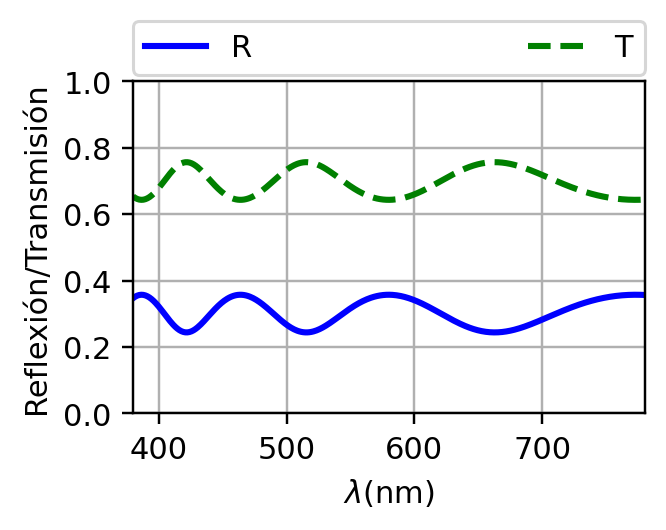

In [ ]:
'''
Ejemplo de cálculo de reflexión y transmisión
'''
import numpy as np
from math import pi
lon_onda=np.linspace(lon_onda_ini,lon_onda_fin,resolucion)
R=Ref(lon_onda,n_capa,h_capa,n_sustrato)

'''
Pintamos la reflexión
'''
xplot,yplot = [],[]
xplot.append(lon_onda)
xplot.append(lon_onda)
yplot.append(R)
yplot.append(1.0-R)

plot_figure(xplot,yplot,xlabel='$\lambda$(nm)',ylabel='Reflexión/Transmisión',path='./',
            pngname='lamina_dielectrica_delgada',xmin=lon_onda_ini,xmax=lon_onda_fin,ymin=0.0,ymax=1.0)

## Pintamos la reflexión y la transmisión  (II)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


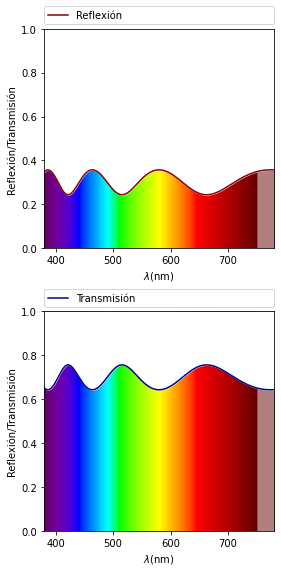

In [ ]:
'''
Para el mismo ejemplo anterior, este código permite graficar la T y la R
incluyendo información visual sobre el color en función de la longitud de onda
'''
wavelengths = np.linspace(lon_onda_ini, lon_onda_fin, 1000)
R = Ref(wavelengths,n_capa,h_capa,n_sustrato)
T = 1.0 -R

plot_figure_rgb(wavelengths,R,T,xlabel='$\lambda$(nm)',ylabel='Reflexión/Transmisión',path='./',
            pngname='lamina_dielectrica_delgada',R_plot=True,T_plot=True)

# Calculamos la reflexión para una longitud de onda en el vacío dada y una determinada anchura con ruido estadístico (gaussiano)

1.132023669304248e-31


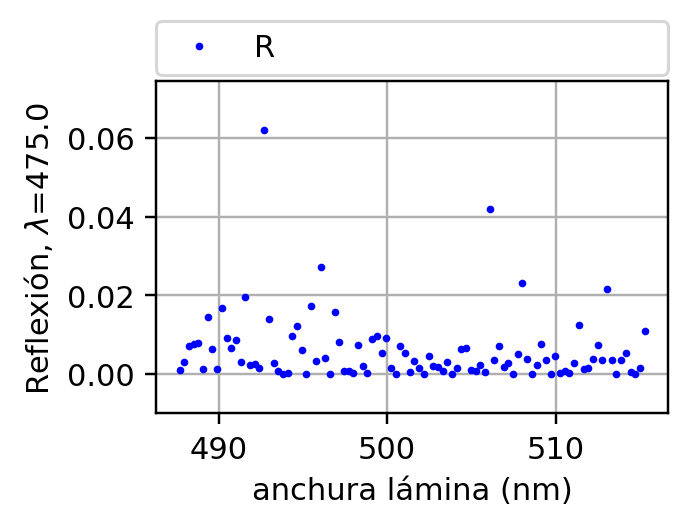

In [ ]:
lambda_0 = 475.0 #nm
print(Ref(lambda_0,n_capa,h_capa,n_sustrato))

mu, sigma = h_capa, 5.0 # media y desviación estándar de nuestras medidas
no_medidas=100
h = np.random.normal(mu, sigma, no_medidas)
y=np.linspace(min(h),max(h),len(h))
R_anchura=Ref(lambda_0,n_capa,h,n_sustrato)

'''
Se pinta el resultado
'''
xplot,yplot = [],[]
xplot.append(y)
yplot.append(R_anchura)

plot_figure(xplot,yplot,xlabel='anchura lámina (nm)',ylabel='Reflexión, $\lambda$='+str(lambda_0),path='./',
            pngname='lamina_dielectrica_delgada',ymin=-0.01,ymax=max((R_anchura)*1.2),line_width=0,symbol_size=3)

## Distribución estadística de una muestra

500.0 5.0
Comprobación distribución normal
0.2805846982287221
0.4671705434587201


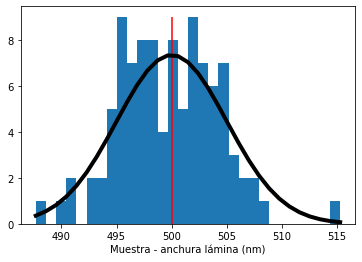

In [ ]:
print(mu,sigma)

print("Comprobación distribución normal")
print(abs(mu - np.mean(h)))
print(abs(sigma - np.std(h,ddof=1))) # ddof=1 para Varianza (dividir por n-1) Ver https://numpy.org/doc/stable/reference/generated/numpy.std.html

# Histograma y distribución normal asociada
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(h,30,density=False)
density = count / (sum(count) * np.diff(bins))
plt.plot(bins, (max(count)/max(density))/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=4, color='k')
plt.vlines(h_capa,0,max(count),colors='r')
plt.xlabel('Muestra - anchura lámina (nm)')
plt.show()

## Distribución muestral de la media aritmética (media de las medias y error cuadrático medio asociado)


Comprobación distribución normal
Media de la población= 500.0 Media de las medias= 500.0527228841089
Media de todas las muestras= [500.22080736844293, 499.45885356039344, 498.12215994421206, 502.0309782384118, 501.98541489588087, 500.50444307676355, 499.7446726973311, 500.3482863130531, 500.9235800647475, 500.84917558816505, 501.737991096479, 500.4046077732943, 499.7286134715374, 500.48676329709133, 500.8925917098788, 500.25459011897465, 499.14114900125094, 500.233417802709, 500.5520416108284, 500.4786642108763, 501.5990588806825, 497.2667183539055, 498.1571450801474, 499.2942564684181, 500.9368648247907, 499.8003841016322, 500.3372730018876, 498.198965127354, 500.2248844824858, 502.25210570722845, 498.95038662613814, 499.2888435305798, 501.0768029861365, 499.8987516468895, 500.85815014822026, 501.0293101394679, 498.28323318686154, 503.32211425723307, 502.93922332629955, 498.21559183359125, 497.38536889292965, 503.0371670681799, 500.5812504131251, 500.17975305488955, 501.31959594423927

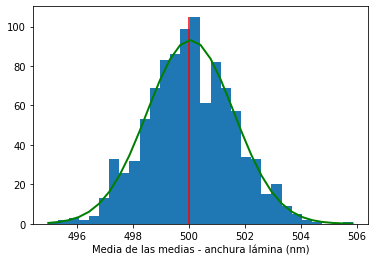

In [ ]:
import matplotlib.pyplot as plt
from math import sqrt

no_medidas=10
N_muestras=1000 # Para llegar al Teorema del límite central N_muestras grande
s,mean_of_means=[],[]
for _ in range(0,N_muestras):
  h = np.random.normal(mu, sigma, no_medidas)
  mean_of_means.append(np.mean(h))

# Verificaciones
print("Comprobación distribución normal")
mu_mu=abs(np.mean(mean_of_means))
print("Media de la población=",mu,"Media de las medias=",mu_mu)
print("Media de todas las muestras=",mean_of_means)
sigma_x=abs(np.std(mean_of_means,ddof=1))
print(" Sigma de la población=",sigma,"Sigma_x=",sigma_x,"; Sigma de la población/sqrt(no_medidas)=",sigma/sqrt(no_medidas))


# Histograma y distribución normal asociada
s=mean_of_means
count, bins, ignored = plt.hist(s,30,density=False)
density = count / (sum(count) * np.diff(bins))
plt.plot(bins, (max(count)/max(density))/(sigma_x * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_mu)**2 / (2 * sigma_x**2) ),
         linewidth=2, color='g')
plt.vlines(h_capa,0,max(count),colors='r')
plt.xlabel('Media de las medias - anchura lámina (nm)')
plt.show()

## Ajuste mínimos cuadrados

0.10549602692184423
a,b= 0.0006111576841620394 , -0.20527394373971516
[0.04029694572055799, 0.055098573903597056, 0.05295065857722898, 0.060283836493347454, 0.05142033204954698, 0.07114177152276514, 0.07261616166688423, 0.0731869443819809, 0.10748768938641953, 0.10378937885715762, 0.10712906306616983, 0.09205631880424592, 0.12113363435817465, 0.12074428167942133, 0.12119528706027435, 0.13642430718862145, 0.15356876356316831, 0.1496455707335638, 0.16322208408866035, 0.15270636372430318]


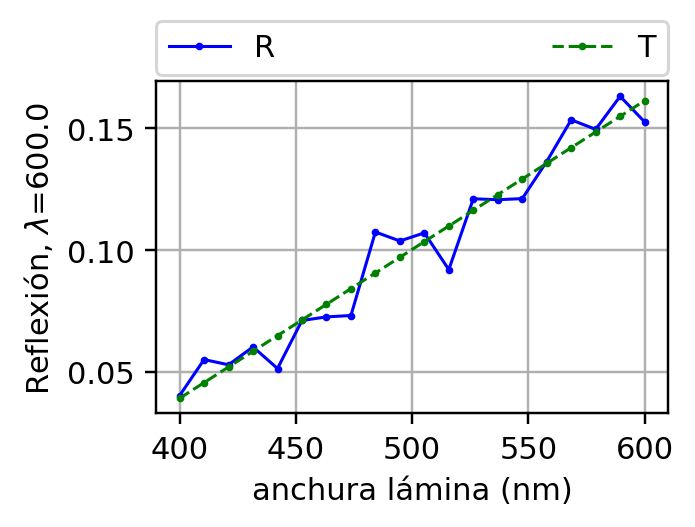

In [ ]:
import random

lambda_0 = 600.0 #nm
print(Ref(lambda_0,n_capa,h_capa,n_sustrato))
'''
mu, sigma = h_capa, 5.0 # media y desviación estándar de nuestras medidas
no_medidas=100
h = np.random.normal(mu, sigma, no_medidas)
y=np.linspace(min(h),max(h),len(h))
R_anchura=Ref(lambda_0,n_capa,h,n_sustrato)
'''
std_h=1.5
R_anchura = [Ref(lambda_0,n_capa,random.gauss(h,std_h),n_sustrato) for h in range(int(h_capa)-10,int(h_capa)+10)]
x=np.linspace(int(h_capa)-100,int(h_capa)+100,len(R_anchura))

'''
Mínimos cuadrados
'''
a,b=np.polyfit(x,R_anchura,1)
print("a,b=",a,',',b)
R_anchura_min=a*x+b
print(R_anchura)
'''
Se pinta el resultado
'''
xplot,yplot = [],[]
xplot.append(x)
xplot.append(x)
yplot.append(R_anchura)
yplot.append(R_anchura_min)

plot_figure(xplot,yplot,xlabel='anchura lámina (nm)',ylabel='Reflexión, $\lambda$='+str(lambda_0),path='./',
            pngname='lamina_dielectrica_delgada',line_width=1,symbol_size=3)


# Reflexión en INCIDENCIA OBLICUA en la interfase entre dos medios con índices de refracción $n_1$ y $n_2$. Se incide desde el medio $1$.

In [ ]:
from math import pi
import numpy as np

def A_f(theta):
  return np.cos(theta)

def B_f(theta,n1,n2):
  return np.sqrt(1.0-(n1*np.sin(theta)/n2)**2)

def Rs(theta,n1,n2):
  A=A_f(theta)
  B=B_f(theta,n1,n2)
  return np.abs((n1*A-n2*B)/(n1*A+n2*B))**2

def Rp(theta,n1,n2):
  A=A_f(theta)
  B=B_f(theta,n1,n2)
  return np.abs((n1*B-n2*A)/(n1*B+n2*A))**2

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


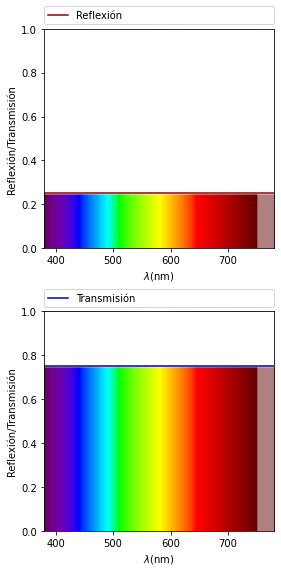

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


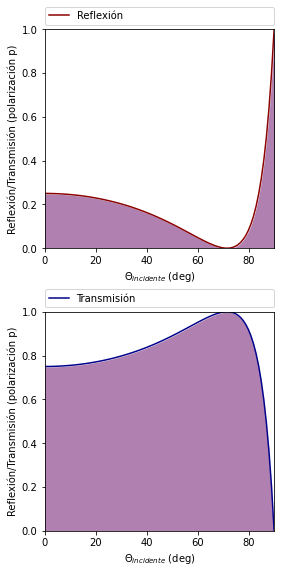

Ángulo de Brewster (deg)= 71.56505117707799
0.7951672353008665
Rp= 0.0
Rs= 0.6399999999999999


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


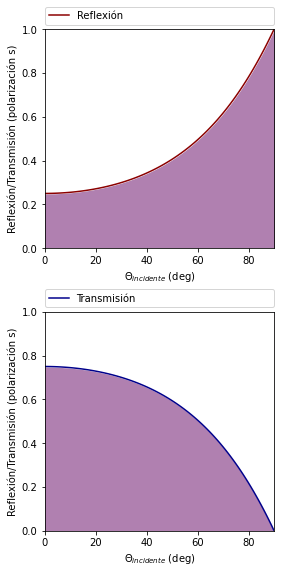

In [ ]:
n1=1.0 # Región de incidencia
n2=3.0 # Región de transmisión

wavelengths = np.linspace(lon_onda_ini, lon_onda_fin, 1000)
R = Rs(0.0,n1,n2)*np.ones(shape=wavelengths.shape)
T = 1.0 -R

plot_figure_rgb(wavelengths,R,T,xlabel='$\lambda$(nm)',ylabel='Reflexión/Transmisión',path='./',
            pngname='incidencia_oblicua_longitud_onda')

angles = np.linspace(0, pi/2.0,90)
R = Rp(angles,n1,n2)
T = 1.0 -R
angles_plot=angles*360.0/(2.0*pi)
plot_figure_rgb(angles_plot,R,T,xlabel='$\Theta_{incidente}$ (deg)',ylabel='Reflexión/Transmisión (polarización p)',path='./',
            pngname='incidencia_oblicua_angulo')

brewster=np.arctan(n2/n1)*360.0/(2.0*pi)
print("Ángulo de Brewster (deg)=",brewster)
print(brewster/90.0)

print("Rp=",Rp(brewster*2.0*pi/360.0,n1,n2))
print("Rs=",Rs(brewster*2.0*pi/360.0,n1,n2))

R = Rs(angles,n1,n2)
T = 1.0 -R
plot_figure_rgb(angles_plot,R,T,xlabel='$\Theta_{incidente}$ (deg)',ylabel='Reflexión/Transmisión (polarización s)',path='./',
            pngname='incidencia_oblicua_angulo')